In [71]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# Load the datasets:
customer_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerDemographic")
trans = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "Transactions")
new_custs = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "NewCustomerList")
address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = "CustomerAddress")

## Data Structure 

In [73]:
# Take a look at the structure of the three data:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [74]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [75]:
new_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [76]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [77]:
# Take a look at each dataset: 
customer_demo.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1029,876,Neil,Jencey,Male,44,1968-10-06,Physical Therapy Assistant,IT,High Net Worth,N,â¤ï¸ ð ð ð ð ð ð ð ð ð ð ð ð ð ð,No,19.0
2604,3852,Zerk,Merrien,Male,44,1982-02-04,Help Desk Operator,NaN,Mass Customer,N,ð¾ ð ð ð ð ð ð ð§,No,4.0
1449,2073,Linea,NaN,Female,87,1974-01-30,NaN,Manufacturing,High Net Worth,N,"<>?:""{}|_+",Yes,10.0
749,1526,Charlie,MacKibbon,Male,50,1964-11-07,Editor,Manufacturing,Mass Customer,N,â,Yes,19.0
2358,2346,Joey,Scheffler,Male,89,1979-09-16,Information Systems Manager,NaN,Mass Customer,N,1,Yes,4.0
1645,1286,Mina,Clawley,Female,83,1975-06-28,Senior Quality Engineer,Manufacturing,High Net Worth,N,-0.5,Yes,16.0
1852,3155,Tiphani,Fritz,Female,88,1976-12-25,Office Assistant I,IT,Affluent Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,21.0
922,1692,Harriette,De Matteis,Female,85,1967-04-07,Senior Quality Engineer,Health,Mass Customer,N,Ù¡Ù¢Ù£,Yes,17.0
1993,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,",ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ",Yes,14.0
3978,3151,Thorn,Choffin,U,20,NaT,Senior Developer,IT,Affluent Customer,N,NaN,Yes,NaN


In [78]:
trans.sample(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
18479,18480,96,1794,2017-12-29,0.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,37539.0
15392,15393,98,2176,2017-06-28,1.0,Approved,OHM Cycles,Standard,medium,medium,795.34,101.58,42172.0
13689,13690,30,2279,2017-05-31,1.0,Approved,Solex,Standard,high,medium,748.17,448.90,33552.0
9766,9767,45,260,2017-02-20,1.0,Approved,Trek Bicycles,Road,low,medium,980.37,234.43,40649.0
9188,9189,0,3251,2017-12-15,1.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,42458.0
2522,2523,82,3195,2017-01-04,1.0,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,42226.0
8701,8702,19,3396,2017-04-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,35160.0
14786,14787,32,87,2017-12-12,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,37337.0
11740,11741,49,248,2017-05-05,1.0,Cancelled,Trek Bicycles,Road,medium,medium,533.51,400.13,41009.0
17856,17857,0,1107,2017-01-31,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [79]:
new_custs.sample(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
970,Mavra,Finan,Female,30,1967-08-23,Nurse,Property,Affluent Customer,N,Yes,...,NSW,Australia,9,1.05,1.3125,1.640625,1.640625,967,967,0.435625
213,Shane,Killen,Male,28,1956-10-16,Account Executive,Entertainment,High Net Worth,N,No,...,NSW,Australia,8,0.56,0.5600,0.560000,0.560000,212,212,1.136875
53,Odessa,Mc Andrew,Female,97,1981-12-01,NaN,Property,Mass Customer,N,No,...,NSW,Australia,10,0.60,0.6000,0.750000,0.637500,54,54,1.381250
49,Thaxter,Kingsbury,Male,12,1950-05-03,Product Engineer,Argiculture,Mass Customer,N,No,...,NSW,Australia,12,0.70,0.7000,0.875000,0.743750,50,50,1.406250
901,Andriana,Gosnoll,Female,53,1964-05-19,Chief Design Engineer,Manufacturing,Mass Customer,N,No,...,NSW,Australia,10,0.49,0.4900,0.612500,0.520625,899,899,0.510000
841,Nichols,Devinn,Male,47,1979-09-29,Recruiter,NaN,Affluent Customer,N,No,...,NSW,Australia,12,0.95,0.9500,1.187500,1.187500,842,842,0.570000
309,Aldric,Birney,Male,21,1971-08-19,NaN,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,6,0.64,0.8000,0.800000,0.680000,310,310,1.022656
275,Dahlia,Shovlar,Female,90,1966-03-07,Environmental Specialist,NaN,Affluent Customer,N,Yes,...,VIC,Australia,3,0.41,0.5125,0.640625,0.640625,274,274,1.051875
833,Teodor,Mullinder,Male,56,1962-08-26,Nuclear Power Engineer,Manufacturing,High Net Worth,N,No,...,VIC,Australia,5,0.53,0.5300,0.530000,0.530000,832,832,0.575000
924,Lezlie,Clemits,Female,2,1973-05-30,Senior Cost Accountant,Financial Services,Mass Customer,N,Yes,...,NSW,Australia,10,0.63,0.7875,0.984375,0.836719,924,924,0.488750


In [80]:
address.sample(10)

,customer_id,address,postcode,state,country,property_valuation
2112,2117,556 Esch Street,2090,NSW,Australia,12
2922,2927,723 Center Court,3933,VIC,Australia,11
343,348,7633 Mayer Plaza,2768,NSW,Australia,10
3154,3159,541 Ramsey Alley,3201,VIC,Australia,7
1213,1218,0 Evergreen Road,3037,VIC,Australia,7
2192,2197,42473 Sycamore Pass,3355,VIC,Australia,4
195,200,7 Havey Point,4005,QLD,Australia,2
3496,3501,16 Carberry Pass,2119,NSW,Australia,11
2262,2267,93 Shasta Avenue,4171,QLD,Australia,10
1186,1191,135 Crest Line Drive,2044,NSW,Australia,10


## Missing Data Check

In [81]:
# Check missing values for Customer Demographics: 
customer_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [82]:
# Check missing values for Transaction Data:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [83]:
# Check missing values for New Customers:
new_custs.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [84]:
# Check missing values for Address data:
address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### Summary for Missing Values:
 

##### Customer Demographic:
 
There are over 500 missing values in the job title and category columns, which is indicates that a lot of customers do not wish to provide their occupancy information. Potential reason could be privacy concerns. There are 125 missing values in the Last Name column, which showes some ambiguity in the customer identification and comparison to the transaction data. The Default column has 302 missing values and since most of the values in this column is not recognisable, the usefulness of it is suspected and the client is suggested to take a closer look at this feature to assess its accessability. There are also 87 missing values in the Tenure column which may of concern.


##### Transaction:

In the transaction data, there are 360 missing values in the Online_Order column, and the same number of missing values (197) in the Brand, Product Line, Product Class, Product Size, Standard Cost and Product First Sold Date columns, which indicates they are from the same transcation records. 


##### New Customers:

In the New Customers data table, there are only 29 missing values in the Last Name column, while still over 100 missing values in the Job related columns. There are also 17 missing values in the Date of Birth (DOB) colum.


##### Address:

In the Address table, there is no missing value which indicates the data table is complete. 

## Data Accuracy Check

### Customer Demographic

In [85]:
# Customer Demographic for numeric variables:
print(customer_demo.describe())

       customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000


In [86]:
# Accuracy check for Categorical & Dates columns:

# For Date of Birth Column:
customer_demo.DOB = customer_demo.DOB.astype('datetime64[ns]')

In [87]:
customer_demo.DOB.describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [88]:
# Create a new column "Age" and take a look at the number of rows with age over 100 (which not make sense)
from datetime import date, datetime
customer_demo['age'] = datetime.now().year - customer_demo['DOB'].dt.year

print(len(customer_demo[customer_demo['age'] > 100]))

1


The first value "1843-12-21" is definitely not correct since the person could be nearly 200 years old. It could be 1943-12-21 instead. There seems only have one date with incorrect value

In [89]:
# Check for Duplicated Values:
customer_demo.duplicated().sum()

0

In [90]:
# Check unique values (there could be some expression issue in columns such as Gender or Owns_Car)

# For Gender:
customer_demo['gender'].unique()

array(['Male', 'Female', 'F', 'Femal', 'M', 'U'], dtype=object)

In [91]:
# For Owns_Car:
customer_demo['owns_car'].unique()

array(['No', 'Yes'], dtype=object)

In [92]:
# Wealth Segment:
customer_demo['wealth_segment'].unique()

array(['Affluent Customer', 'Mass Customer', 'High Net Worth'],
      dtype=object)

In summary, the date of birth column in the customer demographic table has one incorrect value, and there are some expressions in the Gender columns need to be replaced with correct format. 

### Transaction

In [93]:
# Check duplication:
trans.duplicated().sum().any()

False

In [94]:
# Check numeric variables:
trans.transaction_date = pd.to_datetime(trans.transaction_date, format = '%Y-%m-%d')

trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


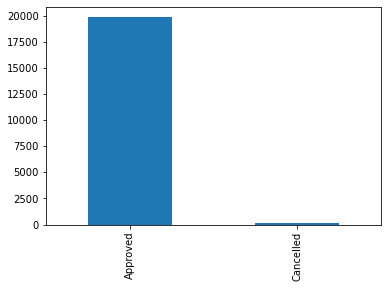

In [95]:
# Check Categorical variables:

# Order Status
trans.order_status.value_counts().plot(kind = 'bar')

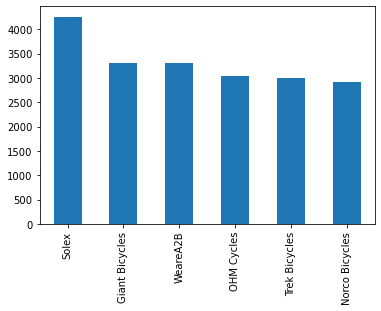

In [96]:
# Brand:
trans.brand.value_counts().plot(kind = 'bar')

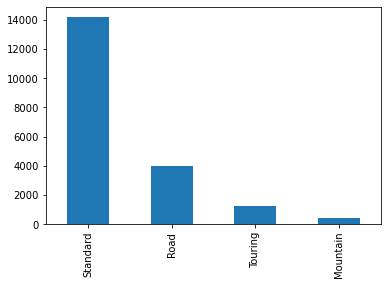

In [97]:
# product line:
trans.product_line.value_counts().plot(kind = 'bar')

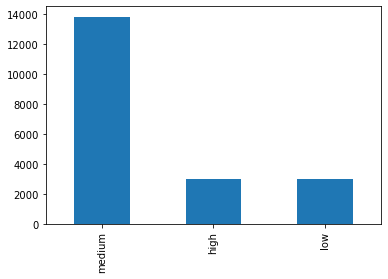

In [98]:
# product category:
trans.product_class.value_counts().plot(kind = 'bar')

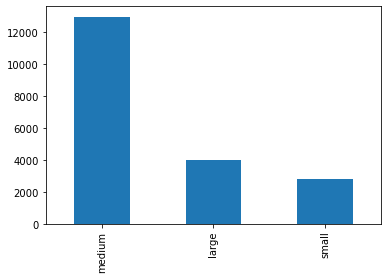

In [99]:
# product size:
trans.product_size.value_counts().plot(kind = 'bar')

In summary, the numeric and categorical variables in the Transaction table seems good without incorrect expressions, extreme values or duplications. The distribution of categorical variables are looking good. The whole table seems well on accuracy. Next, it comes to the accuracy check of the New Customer data

### New Customers

In [100]:
new_custs.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.76,0.9500,1.1875,1.009375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.76,0.7600,0.9500,0.807500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.84,0.8400,0.8400,0.840000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.45,0.5625,0.5625,0.562500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.93,0.9300,1.1625,1.162500,4,4,1.703125


In [101]:
# Print out the summary statistics for numeric columns:
new_custs.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.738400,0.829840,0.931426,0.861111,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.206028,0.251762,0.292789,0.282542,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.620000,0.690000,0.625000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.735000,0.820000,0.921875,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.910000,1.025000,1.125000,1.050000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.703125,1.703125,1000.000000,1000.000000,1.718750


In [102]:
# Check duplication
new_custs.duplicated().sum().any()

False

In [103]:
# Check for some categorical and date variables:

# DOB
new_custs.DOB.describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [104]:
# Check the expressions in the Gender column:
new_custs.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [105]:
# Check job title:
new_custs.job_title.unique()

array(['General Manager', 'Structural Engineer', 'Senior Cost Accountant',
       'Account Representative III', 'Financial Analyst',
       'Assistant Media Planner', 'Compensation Analyst',
       'Human Resources Assistant II', 'Speech Pathologist',
       'Accounting Assistant IV', 'Programmer Analyst I',
       'Environmental Specialist', 'Human Resources Manager',
       'VP Marketing', 'Clinical Specialist', nan, 'Associate Professor',
       'Actuary', 'Internal Auditor', 'Programmer I', 'Quality Engineer',
       'Quality Control Specialist', 'Account Executive', 'Engineer II',
       'Nurse', 'Librarian', 'Paralegal', 'Assistant Manager',
       'Senior Quality Engineer', 'Recruiting Manager', 'Design Engineer',
       'Business Systems Development Analyst', 'VP Quality Control',
       'Cost Accountant', 'Product Engineer', 'Social Worker',
       'Payment Adjustment Coordinator', 'Marketing Assistant',
       'Recruiter', 'VP Product Management', 'Media Manager III',
       

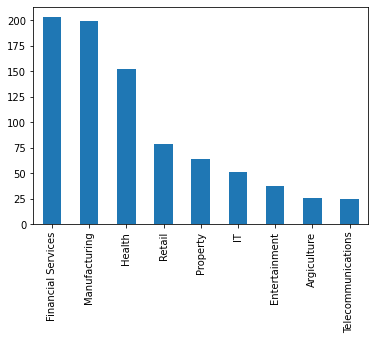

In [106]:
# Check job industry category:
new_custs.job_industry_category.value_counts().plot(kind = 'bar')

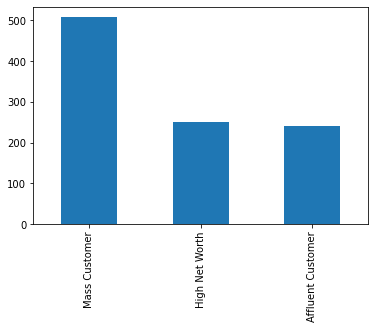

In [107]:
# Check wealth segment:
new_custs.wealth_segment.value_counts().plot(kind = 'bar')

In [108]:
# Check deceased indicator
new_custs.deceased_indicator.value_counts()

N    1000
Name: deceased_indicator, dtype: int64

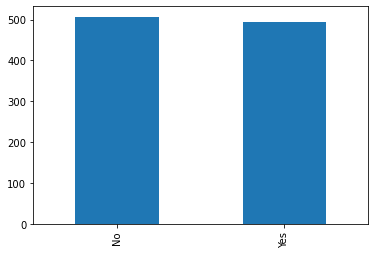

In [109]:
# Check owns car:
new_custs.owns_car.value_counts().plot(kind = 'bar')

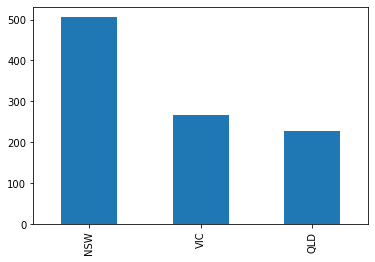

In [110]:
# Check state:
new_custs.state.value_counts().plot(kind = 'bar')

In [111]:
# Check country:
new_custs.country.value_counts()

Australia    1000
Name: country, dtype: int64

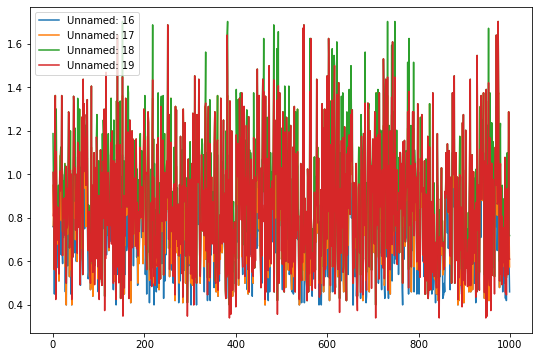

In [112]:
# Take a look at the Unnamed columns:
columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19']
new_custs[columns].plot(figsize = (9,6))

In summary, the data table do not have duplication rows and most of the values in the numerical variables seems correct, while there are four unnamed columns with randomalized values should be more considered as their future's productivity. For categorical variables, in the Gender column, there are 17 rows having 'U' ('Unknown') which may need to be adjusted to correct value. The other categorical variables in the table seems make sense and accurate. 

### Address

In [113]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [114]:
# Check duplications
address.duplicated().sum().any()

False

In [115]:
# Check Numeric variables:
address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [116]:
# Check categorical variables:

# Check Address:
address.address.unique()

array(['060 Morning Avenue', '6 Meadow Vale Court', '0 Holy Cross Court',
       ..., '87 Crescent Oaks Alley', '8194 Lien Street',
       '320 Acker Drive'], dtype=object)

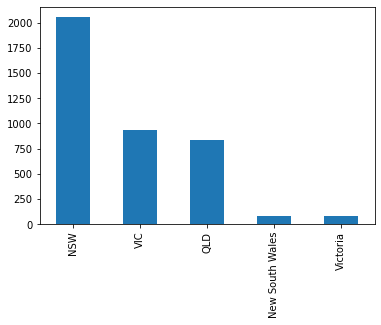

In [117]:
# Check State:
address.state.value_counts().plot(kind = 'bar')

In [118]:
# Check Country:
address.country.value_counts()

Australia    3999
Name: country, dtype: int64

The numerical varibales in the Address data seems accurate without duplication and extreme values. For categorical variables, in the State column, some expressions such as "New South Wales" and "Victoria" should be adjusted to the correct expression "NSW" and "VIC". 